# Gene expression cancer RNA-Seq
#####  This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD.

Source: https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#

In [1]:
%autosave 1
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
from scipy import stats
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Autosaving every 1 seconds


#### Extracting the zipped data

In [2]:
# Extracting the data
!pip install patool
import patoolib
if (os.path.isdir("TCGA-PANCAN-HiSeq-801x20531")) == False:
    patoolib.extract_archive('./TCGA-PANCAN-HiSeq-801x20531.tar.gz')
    print("\nExtract complete")
else:
    print("\nFiles Already Extracted")


Files Already Extracted


### Loading the data

In [3]:
for dirname, _, filenames in os.walk('TCGA-PANCAN-HiSeq-801x20531'):
    for count, filename in enumerate(filenames):
        print(os.path.join(dirname, filename))

TCGA-PANCAN-HiSeq-801x20531\data.csv
TCGA-PANCAN-HiSeq-801x20531\labels.csv


In [4]:
df1 = pd.read_csv("TCGA-PANCAN-HiSeq-801x20531\data.csv")
print("Dataframe 1 (data.csv)")
display(df1.head())

df2 = pd.read_csv("TCGA-PANCAN-HiSeq-801x20531\labels.csv")
print("\nData frame 2 (Labels.csv)")
display(df2.head())

Dataframe 1 (data.csv)


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0



Data frame 2 (Labels.csv)


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


## Data pre-processing

#### Merging dataframes

In [5]:
# convering class labels in df2 into numeric values
df2['labels'] = pd.Categorical(df2['Class']).codes

# Merging the dataframes
df = df2.merge(df1, how='inner', on="Unnamed: 0")
df.rename(columns = {"Unnamed: 0" : "Samples"}, inplace = True)
df.head()

,Samples,Class,labels,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,4,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,3,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,4,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,4,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [6]:
# Check nulls
df.isnull().sum()

Samples       0
Class         0
labels        0
gene_0        0
gene_1        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20534, dtype: int64

In [7]:
df[df.isnull().any(axis = 1)]

,Samples,Class,labels,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 800
Columns: 20534 entries, Samples to gene_20530
dtypes: float64(20531), int8(1), object(2)
memory usage: 125.5+ MB


#### Outlier detection

#### Normalization

In [9]:
# create a dublicate dataframe from df to carry out normalization
df3_norm = df.copy()
df3_norm.drop(["Samples", "Class", "labels"], axis = 1, inplace = True)
scaler = preprocessing.MinMaxScaler(feature_range=(0,2))
names = df3_norm.columns
fitting = scaler.fit_transform(df3_norm)
norm_df = pd.DataFrame(fitting, columns=names)
norm_df.tail()


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
796,0.0,0.598246,0.896579,0.914337,1.075485,0.0,0.835085,0.357626,0.0,0.0,...,1.315543,1.102286,1.008308,0.974079,0.854778,1.278777,1.101394,0.900519,1.550208,0.000000
797,0.0,1.264369,1.469059,0.522363,1.110328,0.0,0.998781,0.000000,0.0,0.0,...,1.430944,1.330438,0.871694,1.423911,0.567708,1.108398,1.344647,0.356229,1.708486,0.000000
798,0.0,1.042028,1.222892,1.240807,0.731658,0.0,1.062504,1.303416,0.0,0.0,...,1.165571,0.872965,1.371240,0.779748,0.717126,1.342877,1.520224,0.647503,0.769607,0.223326
799,0.0,0.830632,0.919595,0.902043,1.062560,0.0,1.556615,0.000000,0.0,0.0,...,1.192353,0.870563,1.763238,1.030875,0.860867,0.922045,1.353450,1.024917,0.965858,0.000000
800,0.0,0.745624,1.255362,0.594097,0.770215,0.0,1.186391,0.000000,0.0,0.0,...,1.443633,0.865579,1.188184,1.985222,1.109285,1.111677,1.484602,0.800301,0.745720,0.000000


In [10]:
# sns.heatmap(norm_df.corr())

## Vizualizing data with t-SNE

In [18]:
# Unnormalized data vizualization
n_components = 2
tsne = TSNE(n_components, perplexity = 42, learning_rate = 100)
tsne_result = tsne.fit_transform(df.drop(["Samples","Class"], axis = 1))
tsne_result_2 = tsne.fit_transform(norm_df)
tsne_result.shape

(801, 2)

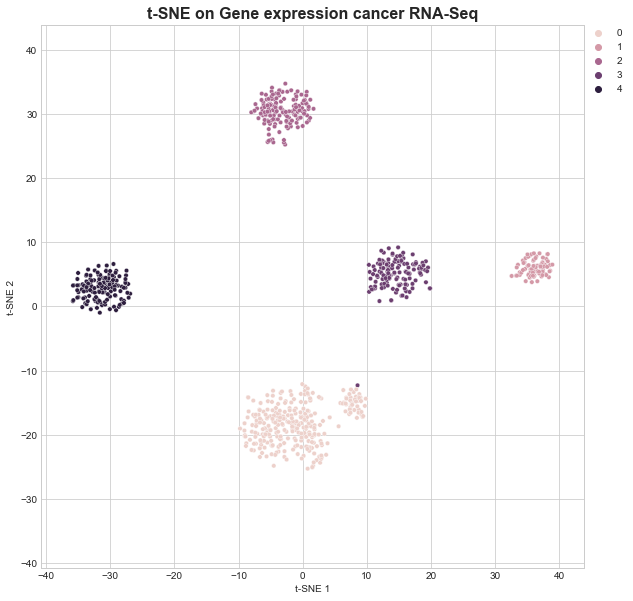

In [19]:
# Plotting the tsne data
tsne_df = pd.DataFrame({"t-SNE 1":tsne_result[:,0], "t-SNE 2":tsne_result[:,1], "label":df['labels']})
fig, ax = plt.subplots(1, figsize=(15,10))
sns.scatterplot(x = 't-SNE 1', y= 't-SNE 2', hue = 'label', data = tsne_df, ax = ax, s=20)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('t-SNE on Gene expression cancer RNA-Seq', fontsize = 16, weight = 'bold')
ax.legend(bbox_to_anchor = (1,1), loc =2, borderaxespad = 0.0)

In [ ]:
# Passing normalized data through t-SNE
n_components = 2
tsne = TSNE(n_components, random_state = None, metric = 'precomputed', verbose = 1)
tsne_result = tsne.fit_transform(df.drop(["Samples","Class"], axis = 1))
tsne_result_2 = tsne.fit_transform(norm_df)
tsne_result_2.shape

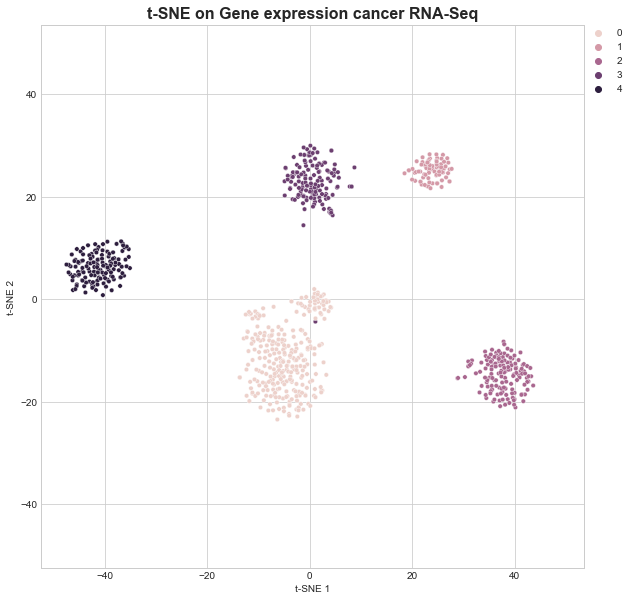

In [17]:
tsne_df = pd.DataFrame({"t-SNE 1":tsne_result_2[:,0], "t-SNE 2":tsne_result_2[:,1], "label":df['labels']})
fig, ax = plt.subplots(1, figsize = (15,10))
sns.scatterplot(x = 't-SNE 1', y= 't-SNE 2', hue = 'label', data = tsne_df, ax = ax, s=20)
lim = (tsne_result_2.min()-5, tsne_result_2.max()+10)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('t-SNE on Gene expression cancer RNA-Seq', fontsize = 16, weight = 'bold')
ax.legend(bbox_to_anchor = (1,1), loc =2, borderaxespad = 0.0)

## Visualizing data in SDD